## Problem 7

## 7.1: Weight Update Equations for Five Gradient Descent Optimizers:

### a) AdaGrad

Adagrad uses a different learning rate $\eta_i$ for every parameter $\theta_i$, which it updates during each step $t_i$ 
Let $g_t$ denote the gradient at time step $t$. $g_{t,i}$ is then the partial derivative of the objective function w.r.t. to the parameter $\theta_i$ at time step $t$. 

Then, the weight update equation: $ g_{t,i} = \Delta_\theta J(\theta_{t,i}) $

The SGD update for every parameter $\theta_i$ at each time step t becomes: $\theta_{i+1} = \theta_{i} -\eta . g_{t,i}$

Thus, the final update rule: $$ \theta_{t+1,i} = \theta_{t,i} + \frac{\eta}{\sqrt{G_{t,i}+\epsilon}}g_t $$
where $G_{t,i}$ is the sum of squares of all gradients wrt $\theta_i$ upto time $t$

HyperParameters: $\eta$, the learning rate

### b) AdaDelta:

Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated past gradients to some fixed size $w$. Starting from AdaGrad, 
$$ \theta_{t+1,i} = \theta_{t,i} + \frac{\eta}{\sqrt{G_{t,i}+\epsilon}}g_t $$
we replace the sum of squares of accumulated weights $G_{t,i}$ with $E[G_{t,i}$, sum of squares of weights only accumulated through the window, which is nothing but the Root Mean Squared error of the weights within the window. Additionally, to match the dimensions of the learning rate, the LR is also defined as an infinitely decaying RMS parameter. This results in the following weight update equation:
$$ \theta_{t+1} = \theta_t - \frac{RMS[\Delta \theta]_{t-1}]}{RMS[g_t}.g_t  $$

### c) RMSProp: 

Developed to sovle the vanishing gradients problem in AdaDelta- retain $\eta$, and apply an exponentially decaying average of square gradients.
$$ \theta_{t+1,i} = \theta_{t,i} + \frac{\eta}{\sqrt{E[g^2]_{t}+\epsilon}}g_t $$
HyperParameter: $\eta$. the learning rate and $\epsilon$, any small value to smoothen out (avoid division by 0)

### d) Adam

In addition to maintaining the average of squared decaying gradients, it also maintains the average of the decaying gradients themselves.
$$ m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t $$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2)g^2_t $$
Thus, the update rule:
$$ \theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{v_t+\epsilon}}\hat{m}_t $$
where $\hat{m}$ and $\hat{v}$ are the gradients of $m$ and $v$ respectively

HyperParameters: $\beta_1$, the factor for momentum calculation, and $\beta_2$, the factor for sum of squared weights.

### e) RMSProp + Nesterov: Nadam

Addition of a Momentum term to RMSProp. 
$$ \theta_{t} = \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v} +\epsilon}}(\beta \hat{m}_t + \frac{1-\beta g_t}{1-\beta}) $$
where $\hat{m}$ is the momentum (average of past exponentially decaying gradients) at time $t$, $\hat{v}$ the average of squares of past exponentially decaying gradients, and $\beta$ the Adam Rule hyperparameter.

HyperParameters: $\beta_1$, the factor for momentum calculation, and $\beta_2$, the factor for sum of squared weights.

Disclaimer: Using a 300 unit dense layer since a model with 784x1000x1000 does not fit into memory (tried until 4 NVDIA P100 GPUs, 102GB RAM with 16 vCPUs)

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

import time

from keras.optimizers import RMSprop,Adagrad,Adadelta,Adam,Nadam
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
import keras.layers as layers
from keras import regularizers

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

#Normalize input
x_test /= 255
x_train /= 255

In [3]:
model = Sequential()
model.add(Dense(300, input_shape=(28,28,1), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Flatten())
model.add(Dense(300,activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(10,activation='softmax'))

In [29]:
opts = ['Adagrad','RMSprop','Nadam','Adadelta','Adam']

histories = []
times = []
metrics = []

for opt in opts:
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(" Using Optimizer: "+opt)
    start = time.time()
    history = model.fit(x_train, y_train,
        batch_size=128,
        epochs=200,
        verbose=0,
        )
    t = time.time()-start
    
    histories.append(history)
    times.append(t)
    metrics.append(model.evaluate(x_test,y_test))

 Using Optimizer: Adagrad
10000/10000 [==============================] - 1s 66us/step
 Using Optimizer: RMSprop
10000/10000 [==============================] - 1s 67us/step
 Using Optimizer: Nadam
10000/10000 [==============================] - 1s 68us/step
 Using Optimizer: Adadelta
10000/10000 [==============================] - 1s 68us/step
 Using Optimizer: Adam
10000/10000 [==============================] - 1s 70us/step


In [30]:
print(times)
print(histories)
print(metrics)

[153.77004885673523, 158.54089736938477, 196.96231698989868, 176.2131621837616, 175.37222576141357]
[<keras.callbacks.callbacks.History object at 0x7f01840ff5f8>, <keras.callbacks.callbacks.History object at 0x7f015c5facc0>, <keras.callbacks.callbacks.History object at 0x7f015c3089b0>, <keras.callbacks.callbacks.History object at 0x7f0154eb6588>, <keras.callbacks.callbacks.History object at 0x7f01549c3e80>]
[[0.05396905895551717, 0.9846000075340271], [0.17004848983989665, 0.9818999767303467], [0.08229756782286436, 0.9830999970436096], [0.09658989797149968, 0.9858999848365784], [0.07053784349224264, 0.9854000210762024]]


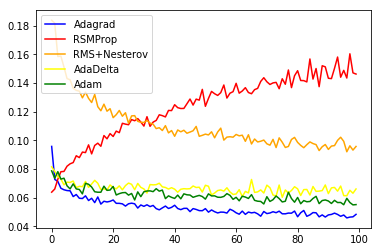

In [34]:
import matplotlib.pyplot as plt

x = [i for i in range(100)]
plt.plot(x, histories[0].history['loss'], color='blue', label='Adagrad')
plt.plot(x, histories[1].history['loss'], color='red', label='RSMProp')
plt.plot(x, histories[2].history['loss'], color='orange', label='RMS+Nesterov')
plt.plot(x, histories[3].history['loss'], color='yellow', label='AdaDelta')
plt.plot(x, histories[4].history['loss'], color='green', label='Adam')
plt.legend()
plt.show()

### A comparison of Test Loss, Accuracy and Training Time for the 5 different optimizers:

Time: AdaGrad trains the fastest , where as RMS+Nesterov trains the slowest (Computationally eexpensive- given a fixed set of epochs). This does not indicate time to convergence. 
Test Loss: AdaGrad has the least test loss (0.053), whereas RMSProp has the highest (0.17). 
Test Accuracy: AdaDelta has the highest test Accuracy (98.54), and RMSProp the least (98.18)

|Optimizer|Test Loss|Test Accuracy|Training Time|
|----------|-----------|-------|--------------|
|AdaGrad|0.05396905895551717|0.9846000075340271|153.77004885673523|
|RMSProp|0.17004848983989665|0.9818999767303467|158.54089736938477|
|RMS+Nesterov|0.08229756782286436|0.9830999970436096|196.96231698989868|
|Nadam|0.09658989797149968|0.9858999848365784|176.2131621837616|
|AdaDelta|0.07053784349224264|0.9854000210762024|175.37222576141357|

### With dropout:

In [25]:
model = Sequential()
model.add(Dropout(0.2,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [31]:
opts = ['Adagrad','RMSprop','Nadam','Adadelta','Adam']

histories_dropout = []
times_dropout = []
metrics_dropout = []

for opt in opts:
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print("Using Optimizer: ",opt)
    start = time.time()
    history = model.fit(x_train, y_train,
        batch_size=128,
        epochs=200,
        verbose=0,
        )
    t = time.time()-start
    
    histories_dropout.append(history)
    times_dropout.append(t)
    metrics_dropout.append(model.evaluate(x_test,y_test))

Using Optimizer:  Adagrad
10000/10000 [==============================] - 1s 70us/step
Using Optimizer:  RMSprop
10000/10000 [==============================] - 1s 71us/step
Using Optimizer:  Nadam
10000/10000 [==============================] - 1s 72us/step
Using Optimizer:  Adadelta
10000/10000 [==============================] - 1s 75us/step
Using Optimizer:  Adam
10000/10000 [==============================] - 1s 77us/step


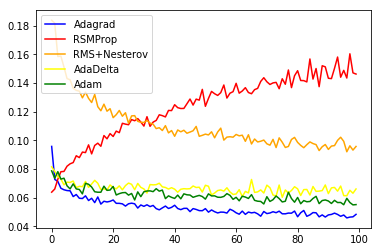

In [36]:
x = [i for i in range(100)]
plt.plot(x, histories[0].history['loss'], color='blue', label='Adagrad')
plt.plot(x, histories[1].history['loss'], color='red', label='RSMProp')
plt.plot(x, histories[2].history['loss'], color='orange', label='RMS+Nesterov')
plt.plot(x, histories[3].history['loss'], color='yellow', label='AdaDelta')
plt.plot(x, histories[4].history['loss'], color='green', label='Adam')
plt.legend()
plt.show()

In [37]:
print(times_dropout)
print(histories_dropout)
print(metrics_dropout)

[155.4027111530304, 161.8654146194458, 198.07765197753906, 178.04522228240967, 177.54143357276917]
[<keras.callbacks.callbacks.History object at 0x7f01545e9e10>, <keras.callbacks.callbacks.History object at 0x7f01542c1630>, <keras.callbacks.callbacks.History object at 0x7f0154041fd0>, <keras.callbacks.callbacks.History object at 0x7efd582a7e48>, <keras.callbacks.callbacks.History object at 0x7efd37ecaac8>]
[[0.06117173416424048, 0.9864000082015991], [0.24486077860649916, 0.984000027179718], [0.09027380716234537, 0.9817000031471252], [0.12017995868224567, 0.9853000044822693], [0.08639935254225972, 0.9833999872207642]]


|Optimizer|Test Loss|Test Accuracy|Training Time|
|----------|-----------|------------|--------------|
|AdaGrad|0.06117173416424048|0.9864000082015991|155.4027111530304|
|RMSProp|0.24486077860649916|0.984000027179718|161.8654146194458|
|RMS+Nesterov|0.09027380716234537|0.9817000031471252|198.07765197753906|
|Nadam|0.12017995868224567|0.9853000044822693|178.04522228240967|
|AdaDelta|0.08639935254225972|0.9833999872207642|177.54143357276917|